In [5]:
import numpy as np

arr_1d = np.array([1,3,4,6])
arr_2d = np.array([
    [2,5,6,7,8],
    [3,6,8,2,2],
    [1,4,6,4,3]
    ])

def func():
  print("1D Array: ",arr_1d )
  print("2D Array: ",arr_2d )
  print("Sum of 1D Array: ", np.sum(arr_1d));
  print("Mean of 2D Array: ",np.mean(arr_2d));
  print("Transpose of 2D array: ", arr_2d.T)


func()


1D Array:  [1 3 4 6]
2D Array:  [[2 5 6 7 8]
 [3 6 8 2 2]
 [1 4 6 4 3]]
Sum of 1D Array:  14
Mean of 2D Array:  4.466666666666667
Transpose of 2D array:  [[2 3 1]
 [5 6 4]
 [6 8 6]
 [7 2 4]
 [8 2 3]]


In [8]:
def processing(image):
  cropped = image[1:4,1:4]
  print("Image After Cropped: \n",cropped)

  inverted_image = 255-cropped
  print("Inverted Image: \n",inverted_image)


image = np.random.randint(0,255,(5,5), dtype = np.uint8)
print("Original Image:\n ",image)
processing(image)


Original Image:
  [[162 245 156 101 231]
 [ 95 101 139  33 254]
 [248 167  48 189 178]
 [ 16  25 109  55  99]
 [250  87  39  29 187]]
Image After Cropped: 
 [[101 139  33]
 [167  48 189]
 [ 25 109  55]]
Inverted Image: 
 [[154 116 222]
 [ 88 207  66]
 [230 146 200]]


In [9]:

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Original Image:



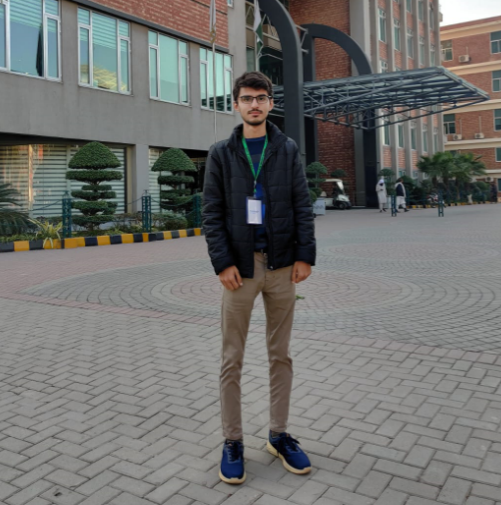

Scalled Image:



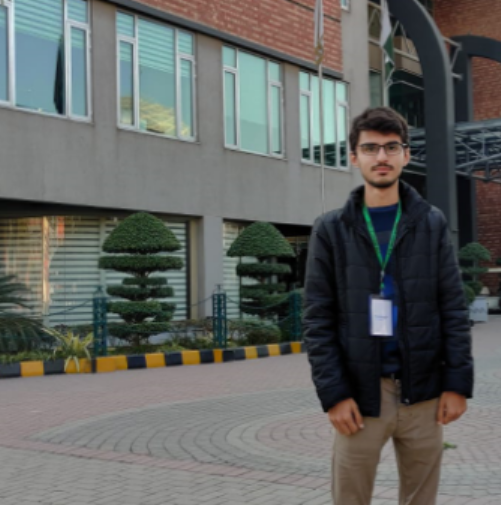

Rotated Image:



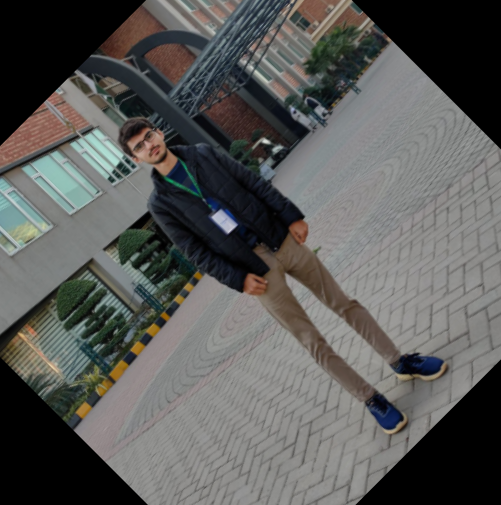

Translated Image:



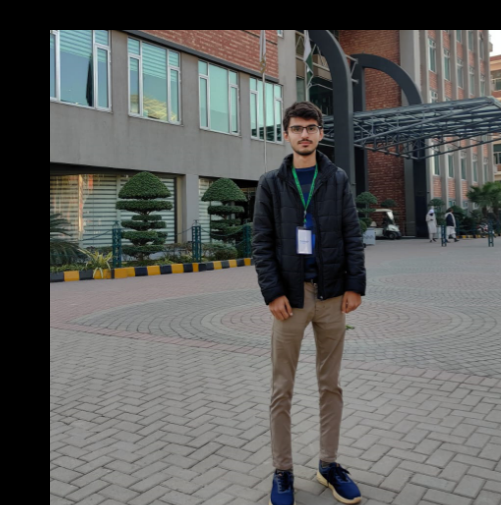

In [25]:
import cv2
import numpy as np

from google.colab.patches import cv2_imshow
#importing my image from drive
path = '/content/drive/MyDrive/MyPic.png'

image = cv2.imread(path)
#scalling image
def scaling_image(image, scale_factor):
    scaling_matrix = np.array([
        [scale_factor, 0, 0],
        [0, scale_factor, 0],
        [0, 0, 1]])

    rows, cols = image.shape[:2]

    scaled_image = cv2.warpPerspective(image, scaling_matrix,(cols, rows))
    return scaled_image

#rotating Image
def rotate_image(image,angle):
  rows, cols = image.shape[:2]

  rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)

  rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
  return rotated_image

#translating_image
def translate_image(image,tx , ty):
  translation_matrix = np.array([
      [1, 0, tx],
      [0, 1, ty],
      [0, 0, 1]
      ], dtype=np.float32)
  rows, cols = image.shape[:2]
  translated_image = cv2.warpPerspective(image, translation_matrix, (cols, rows))
  return translated_image

# Main
print('Original Image:\n')
cv2_imshow(image)

scaled_image = scaling_image(image, 1.5)
print('Scalled Image:\n')
cv2_imshow(scaled_image)

rotated_image = rotate_image(image,45)
print('Rotated Image:\n')
cv2_imshow(rotated_image)

translated_image = translate_image(image,50, 30)
print('Translated Image:\n')
cv2_imshow(translated_image)



Face Region



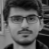

Detected Faces



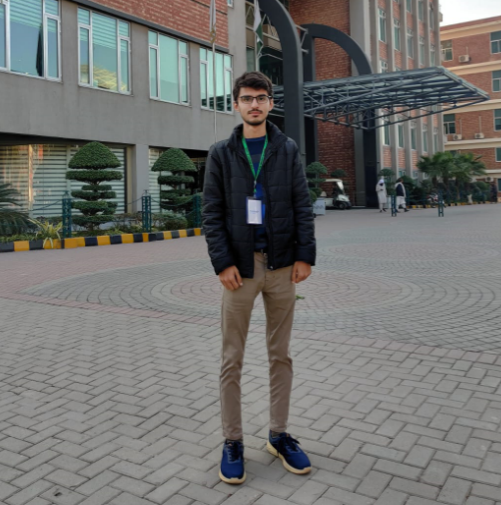

In [32]:
import cv2
import numpy as np

from google.colab.patches import cv2_imshow
#importing my image from drive
path = '/content/drive/MyDrive/MyPic.png'

image = cv2.imread(path)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(image_gray, scaleFactor=1.1, minNeighbors=5)

for (x, y, w, h) in faces:
  face_region = image_gray[y:y+h, x:x+w]
  print("Face Region\n")
  cv2_imshow(face_region)

  eyes_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
  eyes = eyes_cascade.detectMultiScale(face_region, scaleFactor=1.1, minNeighbors=5)

  for (ex, ey, ew, eh) in eyes:
     eye_region = face_region[ey:ey+eh, ex:ex+ew]
     print("Eye Region\n")
     cv2_imshow( eye_region)

#main
print('Detected Faces\n')
cv2_imshow(image)